In [5]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 2. Create Dummy Data (Let's pretend this is House Price Data)
# 'Area' in sqft, 'Bedrooms', 'Age' of house
data = {
    'Area': [1500, 1800, 2400, 3000, 3500, 1200, 2000, 4000],
    'Bedrooms': [3, 3, 4, 4, 5, 2, 3, 5],
    'Age': [10, 15, 5, 20, 2, 30, 10, 1],
    'Price': [300000, 350000, 500000, 550000, 700000, 200000, 380000, 100]
}
df = pd.DataFrame(data)

print("--- The Data ---")
print(df)
print("\n")

# 3. Separate Features (X) and Target (y)
X = df[['Area', 'Bedrooms', 'Age']] # The inputs
y = df['Price']                     # The answer key

# 4. Split: 80% for Training, 20% for Testing
# random_state=42 ensures we get the same split every time (like a seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize the Model
model = LinearRegression()

# 6. Train the Model (Fit)
# "Here are the answers, learn the pattern."
model.fit(X_train, y_train)

# 7. Predict (Test)
# "Here is the exam. Don't look at the answers (y_test)."
predictions = model.predict(X_test)

# 8. Evaluate
print("--- Results ---")
print("Actual Prices:   ", y_test.values)
print("Predicted Prices:", predictions.round(0))

# How far off were we on average?
mae = mean_absolute_error(y_test, predictions)
print(f"Average Error (MAE): ${mae:,.2f}")

# Look at the 'Weights' (Coefficients)
print("\n--- Model Logic ---")
print(f"For every 1 sqft of Area, price increases by: ${model.coef_[0]:.2f}")
print(f"For every 1 Bedroom, price increases by:      ${model.coef_[1]:.2f}")
print(f"For every 1 Year of Age, price changes by:    ${model.coef_[2]:.2f}")

--- The Data ---
   Area  Bedrooms  Age   Price
0  1500         3   10  300000
1  1800         3   15  350000
2  2400         4    5  500000
3  3000         4   20  550000
4  3500         5    2  700000
5  1200         2   30  200000
6  2000         3   10  380000
7  4000         5    1     100


--- Results ---
Actual Prices:    [350000 200000]
Predicted Prices: [433317. 477666.]
Average Error (MAE): $180,491.44

--- Model Logic ---
For every 1 sqft of Area, price increases by: $-580.35
For every 1 Bedroom, price increases by:      $696672.33
For every 1 Year of Age, price changes by:    $26187.39


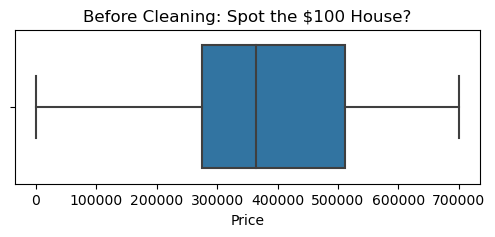

Acceptable Price Range: $-81,250 to $868,750
Original Rows: 8
Clean Rows:    7
Dropped:       1 row(s)

New Average Error (MAE): $13,814.34
Age Coefficient (Impact of Age): -1099.91


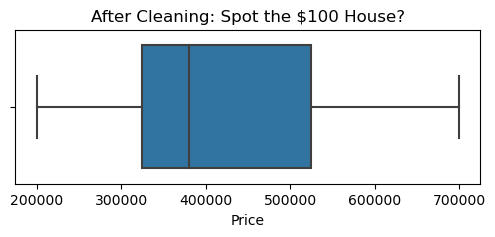

In [10]:
# --- STEP 1: Visualize the Outlier ---
import seaborn as sns
import matplotlib.pyplot as plt

# Let's see the damage first
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Price'])
plt.title("Before Cleaning: Spot the $100 House?")
plt.show()

# --- STEP 2: The Filter Logic (IQR) ---

# 1. Calculate the "Middle 50%" (Q1 and Q3)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the "Fences" (Limits)
# Any price below Lower_Limit or above Upper_Limit is an outlier
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

print(f"Acceptable Price Range: ${Lower_Limit:,.0f} to ${Upper_Limit:,.0f}")

# 3. Create the Clean DataFrame
# We only keep rows where Price is INSIDE the fences
df_clean = df[df['Price'] > 10000]

print(f"Original Rows: {len(df)}")
print(f"Clean Rows:    {len(df_clean)}")
print(f"Dropped:       {len(df) - len(df_clean)} row(s)")

# --- STEP 3: Re-Train on Clean Data ---

# Now use 'df_clean' instead of 'df'
X = df_clean[['Area', 'Bedrooms', 'Age']]
y = df_clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f"\nNew Average Error (MAE): ${mae:,.2f}")
print(f"Age Coefficient (Impact of Age): {model.coef_[2]:.2f}")

# After cleaning
plt.figure(figsize=(6,2))
sns.boxplot(x=df_clean['Price'])
plt.title("After Cleaning: Spot the $100 House?")
plt.show()

--- Results ---
Accuracy: 95.61%


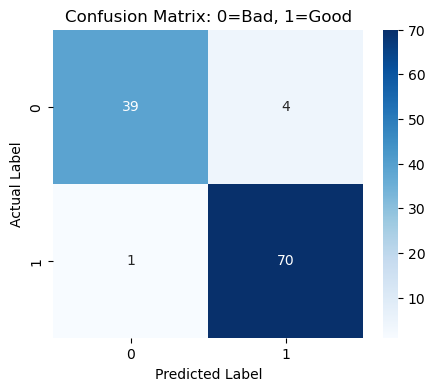

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
# 1. Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Real Data (Built into sklearn)
data = load_breast_cancer()
X = data.data
y = data.target 
# Note: In this specific dataset, 0 = Malignant (Bad), 1 = Benign (Good)
# This is tricky! Usually 1 is the 'Positive' class (the thing we are looking for).
# Let's keep it as is, but remember: 0 is the dangerous one here.

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression
# max_iter=3000 ensures it has enough time to find the pattern
model = LogisticRegression(max_iter=3000) 
model.fit(X_train, y_train)

# 5. Predict
predictions = model.predict(X_test)

# 6. Evaluate
print("--- Results ---")
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc:.2%}") 

# 7. The Confusion Matrix (The Truth Table)
cm = confusion_matrix(y_test, predictions)

# Visualize it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: 0=Bad, 1=Good")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test, predictions))

Decision Tree Accuracy: 74.13%


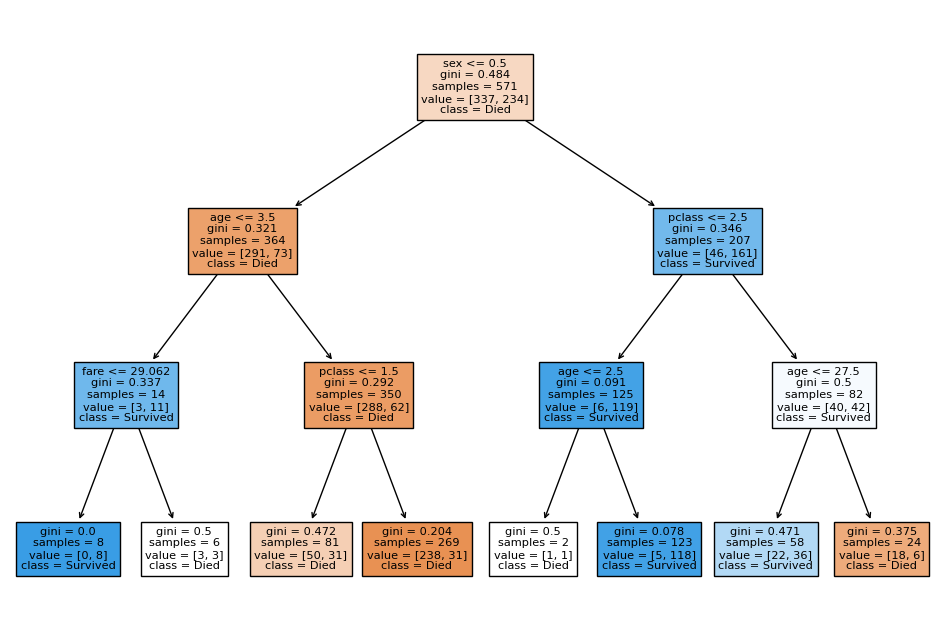

In [16]:
# 1. Import
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 2. Load Titanic Data (Built into Seaborn)
df = sns.load_dataset('titanic')

# 3. The "New Challenge" - Preprocessing
# Keep only useful columns for now
# We drop rows with missing values (.dropna) for speed
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()

# --- CRITICAL STEP: Text to Numbers ---
# We map 'male' -> 0, 'female' -> 1
# This is called "Label Encoding"
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 4. Split Data
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a Decision Tree
# max_depth=3 means "Don't ask more than 3 questions" (Keeps it simple)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate
preds = model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, preds):.2%}")

# 7. VISUALIZE 
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns.tolist(), class_names=['Died', 'Survived'], filled=True)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the "Council"
# n_estimators=100 means "Build 100 trees"
rf_model = RandomForestClassifier(n_estimators=90, random_state=42)


# 2. Train
rf_model.fit(X_train, y_train)

# 3. Evaluate
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)


print(f"Single Tree Accuracy:   {accuracy_score(y_test, preds):.2%}")
print(f"Random Forest Accuracy: {rf_acc:.2%}")



# --- BONUS: The "Why" (Feature Importance) ---
# Which column mattered the most to the Council?
import pandas as pd
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\n--- What Matters Most? ---")
print(importance.sort_values(ascending=False))

Single Tree Accuracy:   74.13%
Random Forest Accuracy: 76.22%

--- What Matters Most? ---
age       0.315836
sex       0.290765
fare      0.288526
pclass    0.104873
dtype: float64


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Define the Model (Empty for now)
rf = RandomForestClassifier(random_state=42)

# 2. Define the "Menu" of Options (Hyperparameter Grid)
# We will test 2 x 3 x 2 = 12 different combinations
param_grid = {
    'n_estimators': [50, 100],         # Try 50 trees and 100 trees
    'max_depth': [3, 5, 10],           # Try simple, medium, and complex trees
    'min_samples_split': [2, 5]        # Try strict and loose splitting rules
}

# 3. Setup the Grid Search
# cv=5 means "Cross Validation": It splits the data 5 ways to be extra sure the score is real.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 4. Run the Search (This might take 10-20 seconds)
print("Testing all combinations...")
grid_search.fit(X_train, y_train)

# 5. The Results
print("\n--- The Winner ---")
print(f"Best Accuracy: {grid_search.best_score_:.2%}")
print(f"Best Parameters: {grid_search.best_params_}")

# 6. Test the Winner on the Exam (Test Set)
best_model = grid_search.best_estimator_
final_acc = best_model.score(X_test, y_test)
print(f"Final Test Accuracy: {final_acc:.2%}")

Testing all combinations...

--- The Winner ---
Best Accuracy: 84.06%
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Final Test Accuracy: 78.32%


In [23]:
# 1. Install XGBoost (if needed)
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score

# 2. Initialize the Model
# n_estimators=100: Build 100 trees
# learning_rate=0.1: "Don't correct the errors too aggressively" (Stability)
# max_depth=5: Keep trees simpler than Random Forest
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 3. Train
model_xgb.fit(X_train, y_train)

# 4. Predict
preds_xgb = model_xgb.predict(X_test)

# 5. Evaluate
acc_xgb = accuracy_score(y_test, preds_xgb)

print(f"Random Forest Accuracy: {final_acc:.2%}")
print(f"XGBoost Accuracy:       {acc_xgb:.2%}")

ModuleNotFoundError: No module named 'xgboost'

In [25]:
!pip install xgboost


In [27]:
# 1. Install XGBoost (if needed)
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score

# 2. Initialize the Model
# n_estimators=100: Build 100 trees
# learning_rate=0.1: "Don't correct the errors too aggressively" (Stability)
# max_depth=5: Keep trees simpler than Random Forest
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 3. Train
model_xgb.fit(X_train, y_train)

# 4. Predict
preds_xgb = model_xgb.predict(X_test)

# 5. Evaluate
acc_xgb = accuracy_score(y_test, preds_xgb)

print(f"Random Forest Accuracy: {final_acc:.2%}")
print(f"XGBoost Accuracy:       {acc_xgb:.2%}")

Random Forest Accuracy: 78.32%
XGBoost Accuracy:       76.92%


In [28]:
import joblib

# 1. SAVE the Model
# We are saving your 'rf_model' (the Random Forest) to a file named 'titanic_captain.pkl'
joblib.dump(rf_model, 'titanic_captain.pkl')

print("Model saved successfully! Check your file folder.")

# --- SIMULATING THE FUTURE ---
# Imagine you deleted everything and restarted the computer...

# 2. LOAD the Model
# We load the brain back from the file. No training needed!
loaded_model = joblib.load('titanic_captain.pkl')

# 3. PROVE IT WORKS
# Let's predict for a random passenger from the test set
passenger = X_test.iloc[0:1] # Pick the first person
prediction = loaded_model.predict(passenger)

print(f"\nLoaded Model Prediction: {prediction[0]} (0=Died, 1=Survived)")
print("It works! The brain is active again.")

Model saved successfully! Check your file folder.

Loaded Model Prediction: 1 (0=Died, 1=Survived)
It works! The brain is active again.


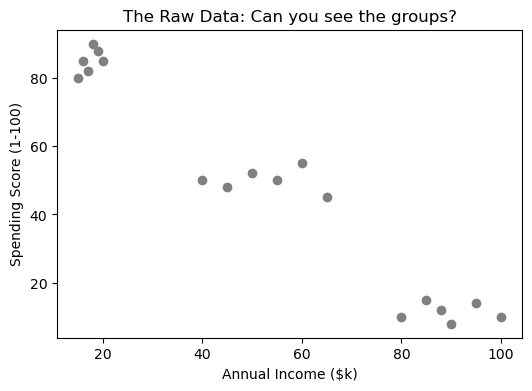

C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


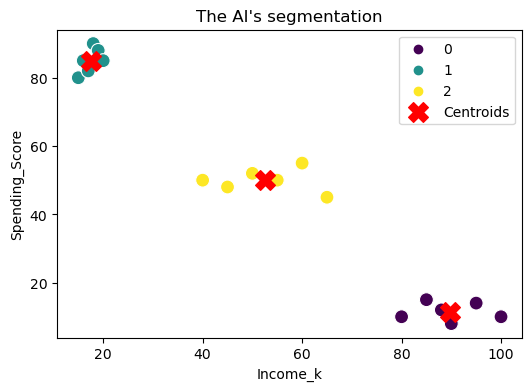

--- The Centroids (Average of each group) ---
[[89.66666667 11.5       ]
 [17.5        85.        ]
 [52.5        50.        ]]


In [3]:
# 1. Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. Create "Mall Customer" Data
# Let's mock up 3 clear groups for now
data = {
    'Income_k': [15, 16, 17, 18, 19, 20,   # Group 1: Low Income
                 80, 85, 88, 90, 95, 100,  # Group 2: High Income
                 40, 45, 50, 55, 60, 65],  # Group 3: Middle Class
    
    'Spending_Score': [80, 85, 82, 90, 88, 85, # Group 1: High Spenders
                       10, 15, 12, 8,  14, 10, # Group 2: Low Spenders
                       50, 48, 52, 50, 55, 45] # Group 3: Moderate
}
df = pd.DataFrame(data)

# 3. Visualize Raw Data (Before AI)
plt.figure(figsize=(6,4))
plt.scatter(df['Income_k'], df['Spending_Score'], c='gray')
plt.title("The Raw Data: Can you see the groups?")
plt.xlabel("Annual Income ($k)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# 4. The Algorithm: K-Means
# n_clusters=3 means "Find me 3 tribes"
kmeans = KMeans(n_clusters=3, random_state=42)

# Note: We fit on 'df' directly. There is no 'y' target!
kmeans.fit(df)

# 5. Get the "Labels" (Which tribe do you belong to?)
df['Cluster'] = kmeans.labels_

# 6. Visualize the Result
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Income_k', y='Spending_Score', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X', label='Centroids')
plt.title("The AI's segmentation")
plt.legend()
plt.show()

print("--- The Centroids (Average of each group) ---")
print(kmeans.cluster_centers_)

Testing K from 1 to 10...


C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

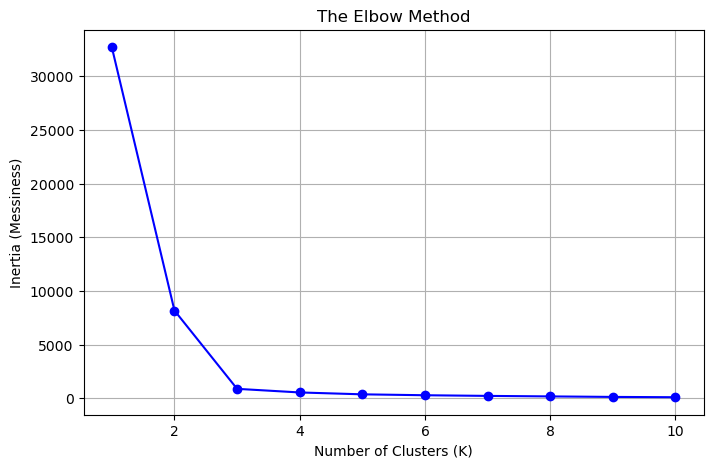

In [2]:
# 1. Store the "Score" (Inertia) for each K
inertia_scores = []
k_range = range(1, 11) # Test K from 1 to 10

print("Testing K from 1 to 10...")

for k in k_range:
    # Train a model for this specific K
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(df[['Income_k', 'Spending_Score']])
    
    # Save the score (inertia_)
    inertia_scores.append(kmeans_test.inertia_)

# 2. Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia_scores, 'bo-') # Blue circles connected by line
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Messiness)')
plt.grid(True)
plt.show()

Testing K from 1 to 10 (Quietly)...


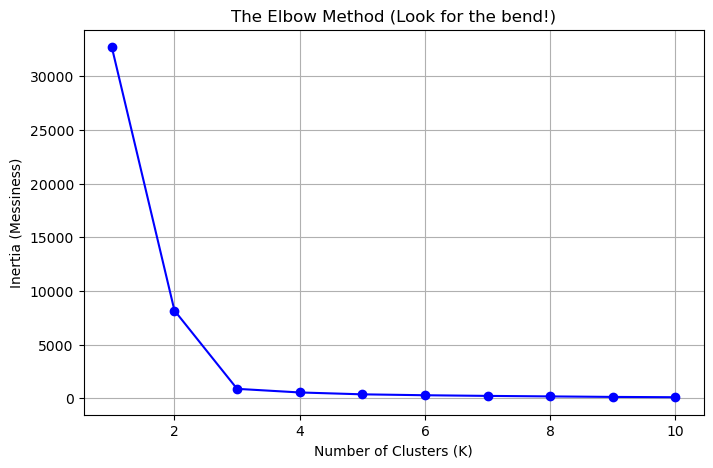

In [4]:
import os
# 1. Fix the Windows Memory Leak Warning
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# 2. Fix the Future Warning (Ignore the noise)
warnings.filterwarnings('ignore')

# --- DATA SETUP (Same as before) ---
data = {
    'Income_k': [15, 16, 17, 18, 19, 20, 80, 85, 88, 90, 95, 100, 40, 45, 50, 55, 60, 65],
    'Spending_Score': [80, 85, 82, 90, 88, 85, 10, 15, 12, 8, 14, 10, 50, 48, 52, 50, 55, 45]
}
df = pd.DataFrame(data)

# --- THE ELBOW METHOD ---
inertia_scores = []
k_range = range(1, 11)

print("Testing K from 1 to 10 (Quietly)...")

for k in k_range:
    # We added 'n_init=10' to fix the FutureWarning
    kmeans_test = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_test.fit(df[['Income_k', 'Spending_Score']])
    inertia_scores.append(kmeans_test.inertia_)

# --- PLOT ---
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia_scores, 'bo-')
plt.title('The Elbow Method (Look for the bend!)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Messiness)')
plt.grid(True)
plt.show()

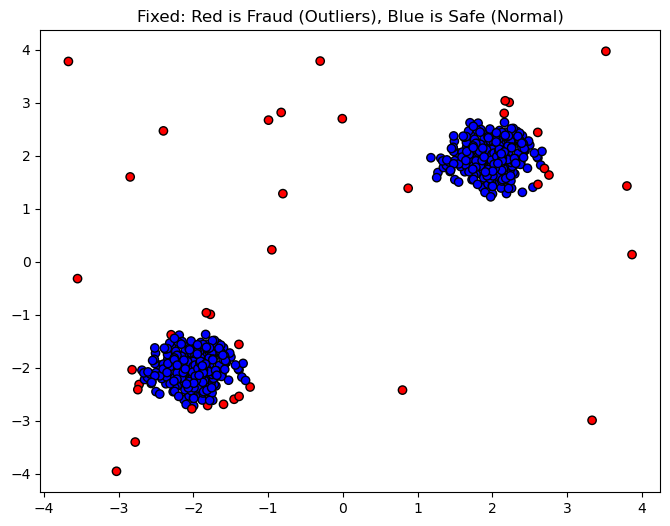

The AI found 38 anomalies.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate "Normal" Data (Cluster of 300 points)
# We make 300 points centered around (0,0)
X_normal = 0.3 * np.random.randn(300, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2] # Split into two blobs

# 2. Generate "Fraud" Data (Outliers)
# We make 20 random points spread far away (-4 to +4)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine them
X = np.r_[X_normal, X_outliers]

# 3. The Algorithm: Isolation Forest
# contamination=0.06 means "I expect about 6% of data to be bad"
model = IsolationForest(contamination=0.06, random_state=42)
model.fit(X)

# 4. Predict (-1 = Anomaly, 1 = Normal)
preds = model.predict(X)

# 5. Visualize
# Create a specific color list
# If pred == 1 (Normal), use 'blue'
# If pred == -1 (Anomaly), use 'red'
colors = ['red' if x == -1 else 'blue' for x in preds]

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k')
plt.title("Fixed: Red is Fraud (Outliers), Blue is Safe (Normal)")
plt.show()

# Let's count them
n_anomalies = (preds == -1).sum()
print(f"The AI found {n_anomalies} anomalies.")

Dataset Size: 5572 messages
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Model Accuracy: 97.85%


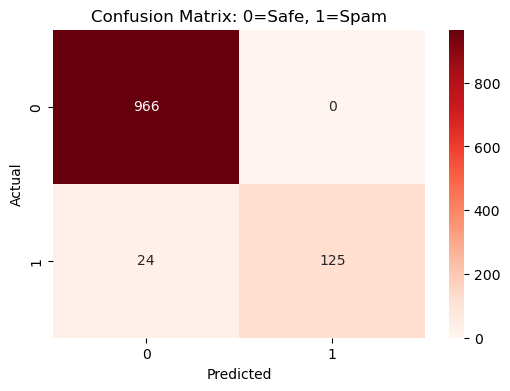

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA (From the web directly)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
# The file is tab-separated (\t), with no header
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# 2. PREVIEW
print(f"Dataset Size: {len(df)} messages")
print(df.head())

# 3. PREPROCESSING (Text to Numbers)
# We convert the labels: 'ham' -> 0, 'spam' -> 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# 4. FEATURE EXTRACTION (The Magic Step)
# TfidfVectorizer does two things:
# a) Count words (Bag of Words)
# b) Downweight common words like "the", "is" (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')

# Learn the vocabulary from Training Data ONLY
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. TRAIN MODEL (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 6. EVALUATE
preds = model.predict(X_test_vec)
acc = accuracy_score(y_test, preds)
print(f"\nModel Accuracy: {acc:.2%}")

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix: 0=Safe, 1=Spam")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
def check_spam(message):
    # 1. Transform the text using the SAME vectorizer we trained
    vec_message = vectorizer.transform([message])
    
    # 2. Predict
    prediction = model.predict(vec_message)[0]
    probability = model.predict_proba(vec_message)[0][1] # Certainty score
    
    # 3. Result
    if prediction == 1:
        return f"🔴 SPAM DETECTED! (Confidence: {probability:.1%})"
    else:
        return f"🟢 Safe Message. (Confidence: {1-probability:.1%})"

# --- THE SIMULATOR LOOP ---
print("--- SPAM BLOCKER 9000 ACTIVATED ---")
print("Type a message to test (or type 'exit' to stop).")

while True:
    user_input = input("\nIncoming Message: ")
    
    if user_input.lower() == 'exit':
        print("System shutting down.")
        break
        
    result = check_spam(user_input)
    print(result)

--- SPAM BLOCKER 9000 ACTIVATED ---
Type a message to test (or type 'exit' to stop).

Incoming Message: Hey mom, are we still on for dinner?
🟢 Safe Message. (Confidence: 99.1%)

Incoming Message: Congrats Mom I heard you won the best mom award
🟢 Safe Message. (Confidence: 86.7%)

Incoming Message: CONGRATULATIONS! You won a $1000 Walmart Gift Card. Click here to claim.
🔴 SPAM DETECTED! (Confidence: 77.1%)

Incoming Message: Urgent: Your account password has expired. Reply with code 1234
🔴 SPAM DETECTED! (Confidence: 62.5%)


In [1]:
import pandas as pd
import numpy as np

# 1. LOAD DATA (Real MovieLens Data)
# ratings.csv: UserID, MovieID, Rating
# movies.csv: MovieID, Title, Genres
print("Downloading Movie Data...")
ratings = pd.read_csv('https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
movies = pd.read_csv('https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], engine='python')

# 2. MERGE (Connect Titles to Ratings)
data = pd.merge(ratings, movies, on='movie_id')

# Limit data for speed (Top 50k rows)
data = data.head(50000)

print(f"Loaded {len(data)} ratings for {len(data['title'].unique())} movies.")

# 3. CREATE THE UTILITY MATRIX (The "Spreadsheet")
# Rows = Users, Columns = Movies, Values = Ratings
# This is the "Map of Taste"
movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')

print("\n--- MATRIX SNAPSHOT ---")
# Show first 5 users and 5 movies. NaN means "Hasn't watched yet".
print(movie_matrix.iloc[:5, :5])

Loaded 50000 ratings for 75 movies.

--- MATRIX SNAPSHOT ---
title    1917 (2019)  American Hustle (2013)  American Made (2017)  \
user_id                                                              
1                NaN                     NaN                   NaN   
2                NaN                     NaN                   NaN   
3               10.0                     NaN                   NaN   
4                NaN                     7.0                   NaN   
5                NaN                     NaN                   NaN   

title    Arrival (2016)  Avatar (2009)  
user_id                                 
1                   NaN            NaN  
2                   NaN            9.0  
3                   NaN            NaN  
4                   NaN            NaN  
5                   NaN            NaN  


In [4]:
# 1. Calculate the "Popularity" (Number of ratings per movie)
ratings_count = data.groupby('title')['rating'].count()

# 2. Grab the ratings specifically for "Avatar (2009)"
# Note: Ensure the string matches exactly what's in your dataset
avatar_ratings = movie_matrix['Avatar (2009)']

# 3. Calculate Correlation (The "Similarity Score")
# We compare Avatar's column with EVERY other column in the matrix
similar_to_avatar = movie_matrix.corrwith(avatar_ratings)

# 4. Turn it into a DataFrame
corr_avatar = pd.DataFrame(similar_to_avatar, columns=['Correlation'])
corr_avatar.dropna(inplace=True) # Drop movies that have no shared users

# 5. Join with the Rating Counts
corr_avatar = corr_avatar.join(ratings_count)

# 6. FILTER & SORT
# We only look at movies with > 30 ratings to avoid "noise"
recommendations = corr_avatar[corr_avatar['rating'] > 30].sort_values('Correlation', ascending=False)

print("--- If you liked Avatar, you might like: ---")
print(recommendations.head(100))

--- If you liked Avatar, you might like: ---
                                                    Correlation  rating
title                                                                  
Avatar (2009)                                          1.000000     203
The Edge of Seventeen (2016)                           0.952579     336
Tenet (2020)                                           0.751809     738
Snatch (2000)                                          0.675666     452
The Girl with the Dragon Tattoo (2011)                 0.616273     304
Inglourious Basterds (2009)                            0.595314     854
Knives Out (2019)                                      0.573462    1315
Once Upon a Time ...in Hollywood (2019)                0.559865    1620
The Great Gatsby (2013)                                0.484392    1936
The Ugly Truth (2009)                                  0.474342      64
The Invisible Man (2020)                               0.443203     489
Se7en (1995)       

C:\Users\prudh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prudh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


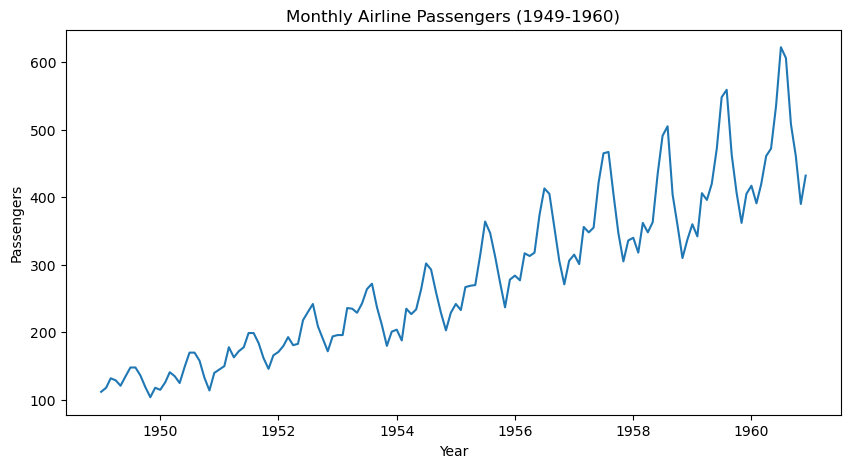

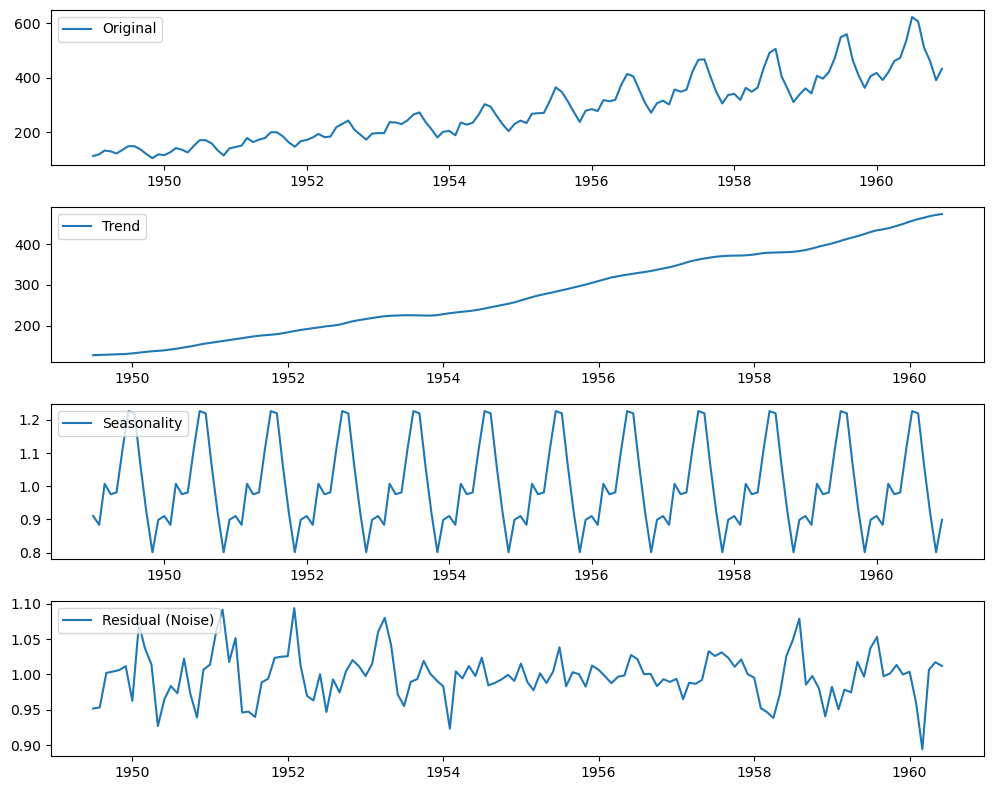

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. LOAD DATA
# We use a URL to get the raw CSV
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# 2. VISUALIZE THE RAW DATA
plt.figure(figsize=(10,5))
plt.plot(df)
plt.title("Monthly Airline Passengers (1949-1960)")
plt.ylabel("Passengers")
plt.xlabel("Year")
plt.show()

# 3. DECOMPOSE (The "X-Ray")
# model='multiplicative' means the seasonality grows as the trend grows (common in sales/growth)
result = seasonal_decompose(df['Passengers'], model='multiplicative')

# 4. PLOT THE 3 LAYERS
plt.figure(figsize=(10,8))

plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual (Noise)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Training the Time Machine...


C:\Users\prudh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prudh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prudh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


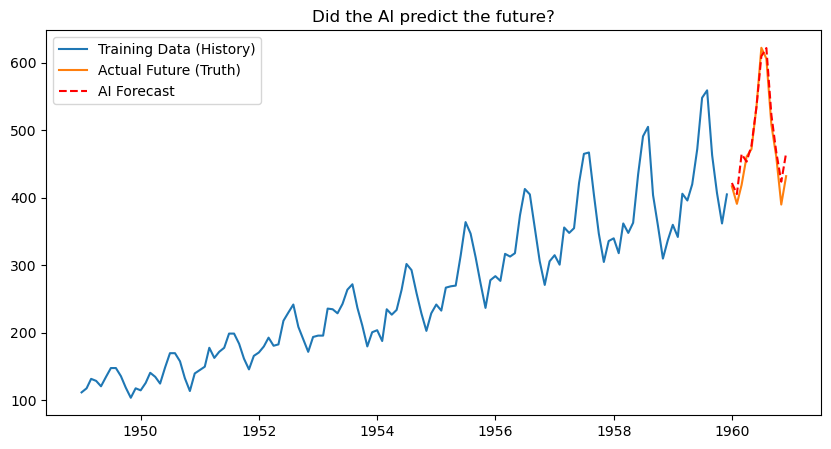

Root Mean Squared Error: 21.18


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. SETUP: Train vs Test
# We hide the last 12 months (1 year) to test the AI
train = df.iloc[:-12]
test = df.iloc[-12:]

# 2. THE MODEL: SARIMA
# order=(1,1,1): Standard trend handling
# seasonal_order=(1,1,1,12): "Look back 12 steps for the pattern"
print("Training the Time Machine...")
model = SARIMAX(train['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

model_fit = model.fit(disp=False)

# 3. THE FORECAST
# We ask it to predict the 12 months we hid
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, dynamic=False)

# 4. VISUALIZE
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Passengers'], label='Training Data (History)')
plt.plot(test.index, test['Passengers'], label='Actual Future (Truth)')
plt.plot(test.index, predictions, color='red', linestyle='--', label='AI Forecast')
plt.title("Did the AI predict the future?")
plt.legend()
plt.show()

# 5. SCORE
# RMSE: On average, how many passengers was it off by?
rmse = np.sqrt(mean_squared_error(test['Passengers'], predictions))
print(f"Root Mean Squared Error: {rmse:.2f}")

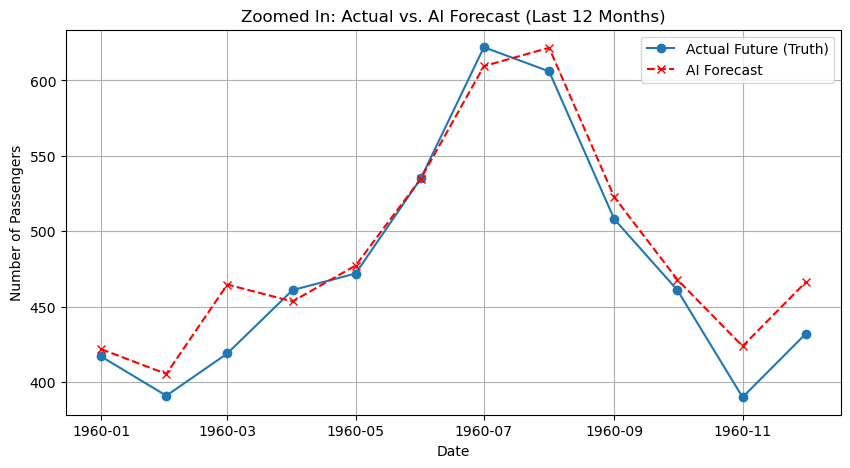

In [7]:
# Zooming in on the last 12 months (The Prediction Period)
plt.figure(figsize=(10,5))

# 1. Plot the Actual data (The Truth)
# We use the 'test' dataframe which contains only the last 12 months
plt.plot(test.index, test['Passengers'], label='Actual Future (Truth)', marker='o')

# 2. Plot the Prediction (The AI)
# We use the 'predictions' variable we generated earlier
plt.plot(test.index, predictions, color='red', linestyle='--', label='AI Forecast', marker='x')

# 3. Formatting
plt.title("Zoomed In: Actual vs. AI Forecast (Last 12 Months)")
plt.ylabel("Number of Passengers")
plt.xlabel("Date")
plt.legend()
plt.grid(True) # Grid helps to see the exact difference
plt.show()

In [ ]:
print("Version 2: Added Model Evaluation")